https://data912.com/#/Live%20prices/___arg_stocks_live_arg_stocks_get

In [ ]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime


In [ ]:
import pandas as pd
import requests
from datetime import date, timedelta
import matplotlib.pyplot as plt


#%%time

tickers = {
    "S16A5": date(2025, 4, 16),
    "S28A5": date(2025, 4, 28),
    "S16Y5": date(2025, 5, 16),
    "S30Y5": date(2025, 5, 30),
    "S18J5": date(2025, 6, 18),
    "S30J5": date(2025, 6, 30),
    "S31L5": date(2025, 7, 31),
    "S15G5": date(2025, 8, 15),
    "S29G5": date(2025, 8, 29),
    "S12S5": date(2025, 9, 12),
    "S30S5": date(2025, 9, 30),
    "T17O5": date(2025, 10, 15),
    "S31O5": date(2025, 10, 31),
    "S10N5": date(2025, 11, 10),
    "S28N5": date(2025, 11, 28),
    "T15D5": date(2025, 12, 15),
    "T30E6": date(2026, 1, 30),
    "T13F6": date(2026, 2, 13),
    "T30J6": date(2026, 6, 30),
    # "TO26":  date(2026, 10, 17),
    "T15E7": date(2027, 1, 15),
    "TTM26": date(2026, 3, 16),
    "TTJ26": date(2026, 6, 30),
    "TTS26": date(2026, 9, 15),
    "TTD26": date(2026, 12, 15),


}

payoff = {
    "S16A5": 131.211,
    "S28A5": 130.813,
    "S16Y5": 136.861,
    "S30Y5": 136.331,
    "S18J5": 147.695,
    "S30J5": 146.607,
    "S31L5": 147.74,
    "S15G5": 146.794,
    "S29G5": 157.7,
    "S12S5": 158.977,
    "S30S5": 159.734,
    "T17O5": 158.872,
    "S31O5": 132.821,
    "S10N5": 122.254,
    "S28N5": 123.561,
    "T15D5": 170.838,
    "T30E6": 142.222,
    "T13F6": 144.966,
    "T30J6": 144.896,
    # "TO26": 123.25, # Habria que calcular aparte la reinversion de cupones
    "T15E7": 160.777,
    "TTM26": 135.238,
    "TTJ26": 144.629,
    "TTS26": 152.096,
    "TTD26": 161.144,
}


# para los duales esta considerado solo la tasa fija, se puede agregar proyeccion de TAMAR c/API del BCRA

meps = requests.get('https://data912.com/live/mep').json()
notes = requests.get('https://data912.com/live/arg_notes').json()
bonds = requests.get('https://data912.com/live/arg_bonds').json()
mep = pd.DataFrame(meps).close.median()
df = pd.DataFrame(notes+bonds)

Tabla de bonos con TIR calculada en ARS:
   Ticker Vencimiento  Precio (ARS)  Payoff (ARS) TIR (ARS)
0   S30J5  2025-06-30        145.68        146.61    33.80%
1   S31L5  2025-07-31        142.98        147.74    35.89%
2   S15G5  2025-08-15        140.04        146.79    37.53%
3   S29G5  2025-08-29        149.00        157.70    35.64%
4   S12S5  2025-09-12        148.73        158.98    34.55%
5   S30S5  2025-09-30        147.60        159.73    33.47%
6   T17O5  2025-10-15        144.25        158.87    35.89%
7   S31O5  2025-10-31        119.80        132.82    33.34%
8   S10N5  2025-11-10        109.44        122.25    33.20%
9   S28N5  2025-11-28        108.75        123.56    34.09%
10  T15D5  2025-12-15        147.90        170.84    34.88%
11  T30E6  2026-01-30        119.00        142.22    34.08%
12  T13F6  2026-02-13        120.20        144.97    33.64%
13  TTM26  2026-03-16        112.50        135.24    28.64%
14  T30J6  2026-06-30        108.75        144.90    32.45%

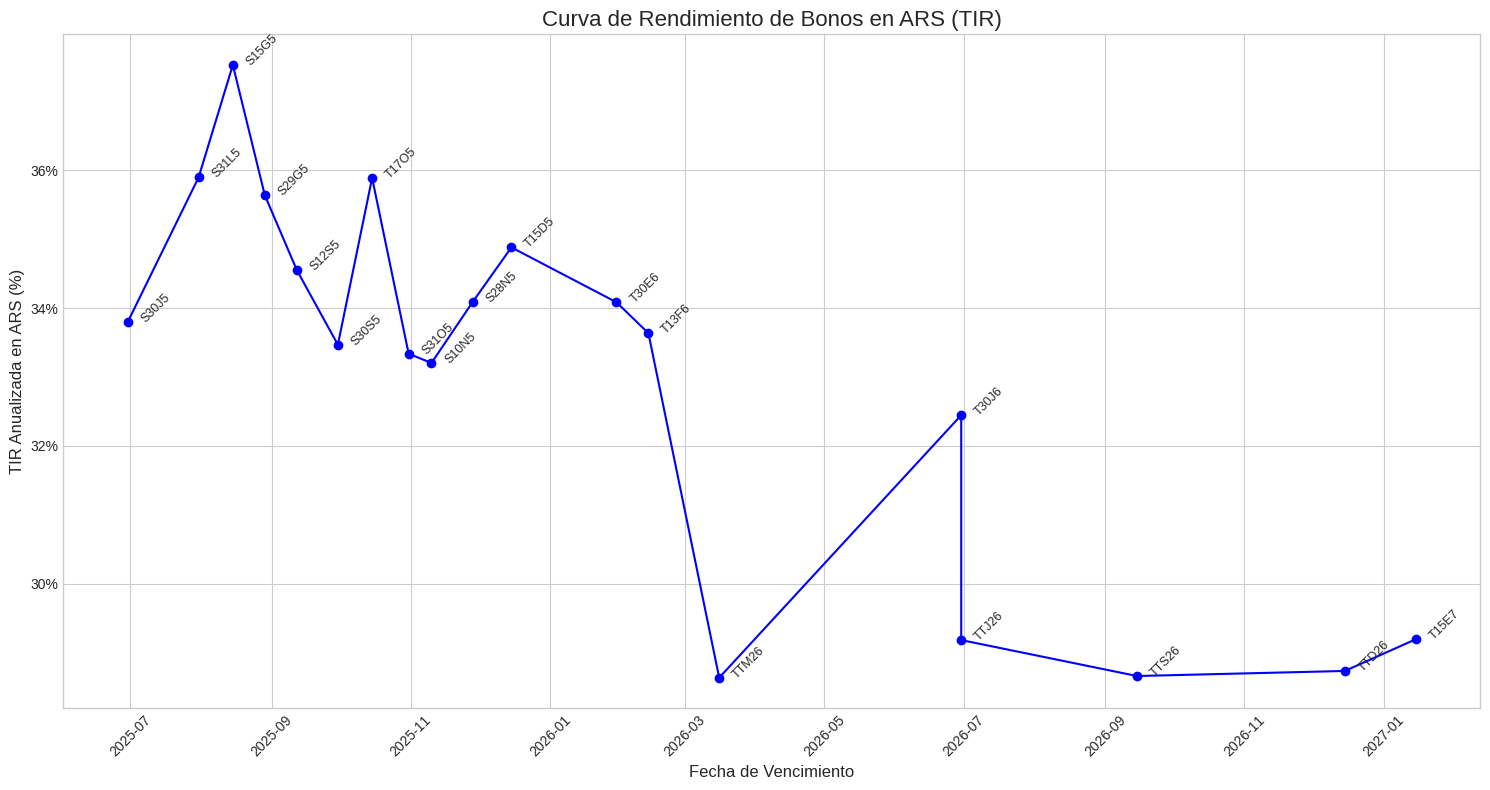

In [ ]:
import pandas as pd
import requests
from datetime import date, timedelta
import matplotlib.pyplot as plt

# --- Tu código original ---
tickers = {
    "S16A5": date(2025, 4, 16), "S28A5": date(2025, 4, 28), "S16Y5": date(2025, 5, 16),
    "S30Y5": date(2025, 5, 30), "S18J5": date(2025, 6, 18), "S30J5": date(2025, 6, 30),
    "S31L5": date(2025, 7, 31), "S15G5": date(2025, 8, 15), "S29G5": date(2025, 8, 29),
    "S12S5": date(2025, 9, 12), "S30S5": date(2025, 9, 30), "T17O5": date(2025, 10, 15),
    "S31O5": date(2025, 10, 31), "S10N5": date(2025, 11, 10), "S28N5": date(2025, 11, 28),
    "T15D5": date(2025, 12, 15), "T30E6": date(2026, 1, 30), "T13F6": date(2026, 2, 13),
    "T30J6": date(2026, 6, 30), "T15E7": date(2027, 1, 15), "TTM26": date(2026, 3, 16),
    "TTJ26": date(2026, 6, 30), "TTS26": date(2026, 9, 15), "TTD26": date(2026, 12, 15),
}

payoff = {
    "S16A5": 131.211, "S28A5": 130.813, "S16Y5": 136.861, "S30Y5": 136.331,
    "S18J5": 147.695, "S30J5": 146.607, "S31L5": 147.74, "S15G5": 146.794,
    "S29G5": 157.7, "S12S5": 158.977, "S30S5": 159.734, "T17O5": 158.872,
    "S31O5": 132.821, "S10N5": 122.254, "S28N5": 123.561, "T15D5": 170.838,
    "T30E6": 142.222, "T13F6": 144.966, "T30J6": 144.896, "T15E7": 160.777,
    "TTM26": 135.238, "TTJ26": 144.629, "TTS26": 152.096, "TTD26": 161.144,
}

# Se obtienen solo los datos de bonos y obligaciones negociables. Se quita el MEP.
notes = requests.get('https://data912.com/live/arg_notes').json()
bonds = requests.get('https://data912.com/live/arg_bonds').json()
df = pd.DataFrame(notes + bonds)
# --- Fin de tu código original ---


# --- Comienzo del análisis (en ARS) ---

# Filtrar el DataFrame para incluir solo los tickers que nos interesan
df_filtered = df[df['symbol'].isin(tickers.keys())].copy()

# Agregar la fecha de vencimiento y el payoff
df_filtered['vencimiento'] = df_filtered['symbol'].map(tickers)
df_filtered['payoff'] = df_filtered['symbol'].map(payoff)

# Calcular los días y años hasta el vencimiento
hoy = pd.to_datetime(date.today())
df_filtered['vencimiento'] = pd.to_datetime(df_filtered['vencimiento'])
df_filtered['dias_vencimiento'] = (df_filtered['vencimiento'] - hoy).dt.days
df_filtered['anios_vencimiento'] = df_filtered['dias_vencimiento'] / 365.25

# Calcular la TIR en ARS. Se usa el precio de cierre 'c' directamente.
df_filtered['precio_ars'] = df_filtered['c']
df_filtered['tir_ars'] = (df_filtered['payoff'] / df_filtered['precio_ars'])**(1 / df_filtered['anios_vencimiento']) - 1

# Ordenar por vencimiento para graficar
df_sorted = df_filtered.sort_values('vencimiento').reset_index(drop=True)

# Imprimir la tabla de resultados
print("Tabla de bonos con TIR calculada en ARS:")
# Seleccionar y renombrar columnas para una mejor presentación
df_display = df_sorted[['symbol', 'vencimiento', 'precio_ars', 'payoff', 'tir_ars']].copy()
df_display.rename(columns={
    'symbol': 'Ticker',
    'vencimiento': 'Vencimiento',
    'precio_ars': 'Precio (ARS)',
    'payoff': 'Payoff (ARS)',
    'tir_ars': 'TIR (ARS)'
}, inplace=True)
# Formatear la columna de TIR como porcentaje
df_display['TIR (ARS)'] = df_display['TIR (ARS)'].apply(lambda x: f'{x:.2%}')
df_display['Vencimiento'] = df_display['Vencimiento'].dt.strftime('%Y-%m-%d')


print(df_display.round(2))


# Graficar la curva de rendimiento en ARS
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))

# Usar el DataFrame ordenado y la TIR en ARS para el gráfico
ax.plot(df_sorted['vencimiento'], df_sorted['tir_ars'] * 100, marker='o', linestyle='-', color='b')

# Anotar cada punto con el ticker
for i, row in df_sorted.iterrows():
    ax.text(row['vencimiento'] + timedelta(days=5), row['tir_ars'] * 100, row['symbol'],
            ha='left', rotation=45, fontsize=9)

ax.set_title('Curva de Rendimiento de Bonos en ARS (TIR)', fontsize=16)
ax.set_xlabel('Fecha de Vencimiento', fontsize=12)
ax.set_ylabel('TIR Anualizada en ARS (%)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,symbol,q_bid,px_bid,px_ask,q_ask,v,q_op,c,pct_change
0,BNA6D,1090.0,101.80,104.90,1809.0,3.118000e+03,17.0,102.001,0.00
1,S10L5,100358000.0,100.38,101.90,1138800.0,1.423218e+10,407.0,100.390,0.36
2,S10N5,1470149.0,101.00,111.85,20000.0,1.255191e+09,650.0,109.445,0.50
3,S12S5,1962166.0,148.72,158.00,92212.0,5.009612e+09,940.0,148.730,0.32
4,S15G5,120119.0,139.00,142.00,868719.0,1.134188e+10,2470.0,140.039,0.38


In [ ]:
df.columns

Index(['symbol', 'q_bid', 'px_bid', 'px_ask', 'q_ask', 'v', 'q_op', 'c',
       'pct_change'],
      dtype='object')

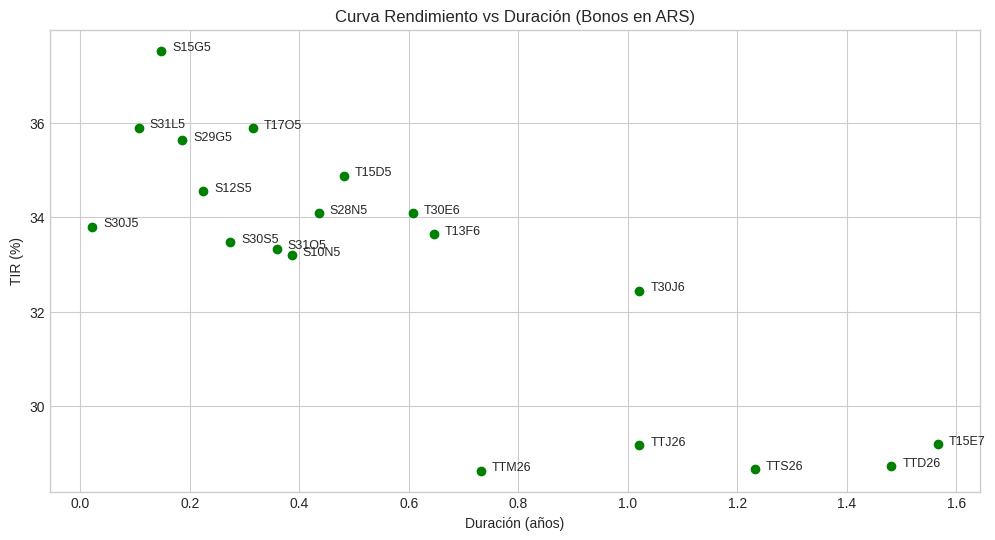

In [ ]:
# Duración simple (años hasta vencimiento)
df_sorted['duracion_simple'] = df_sorted['anios_vencimiento']

# Gráfico TIR vs Duración
plt.figure(figsize=(12, 6))
plt.scatter(df_sorted['duracion_simple'], df_sorted['tir_ars'] * 100, color='green')

# Anotar cada punto con el ticker
for i, row in df_sorted.iterrows():
    plt.text(row['duracion_simple'] + 0.02, row['tir_ars'] * 100, row['symbol'], fontsize=9)

plt.title('Curva Rendimiento vs Duración (Bonos en ARS)')
plt.xlabel('Duración (años)')
plt.ylabel('TIR (%)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import requests

try:
    # Usamos el endpoint de Merval que corresponde a las acciones
    response = requests.get('https://data912.com/live/arg_stocks')   #ACÁ MODIFICO EL ENDPOINT
    response.raise_for_status()

    acciones_data = response.json()
    df = pd.DataFrame(acciones_data)

    # Asegurarnos que las columnas numéricas sean del tipo correcto
    numeric_cols = ['c', 'v', 'pct_change', 'px_bid', 'px_ask']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Eliminar filas donde no se pudo convertir un valor
    df.dropna(subset=numeric_cols, inplace=True)

    # Ordenar por el cambio porcentual
    df_sorted = df.sort_values('pct_change', ascending=False)

    print("--- 5 Acciones con Mayor Sube del Día ---")
    # Mostramos el Ticker, Precio, y el Cambio %
    print(df_sorted[['symbol', 'c', 'pct_change']].head(5).to_string(index=False))

    print("\n--- 5 Acciones con Mayor Baja del Día ---")
    print(df_sorted[['symbol', 'c', 'pct_change']].tail(5).sort_values('pct_change').to_string(index=False))

except requests.exceptions.RequestException as e:
    print(f"Error al obtener los datos: {e}")
except Exception as e:
    print(f"Ocurrió un error al procesar los datos: {e}")



--- 5 Acciones con Mayor Sube del Día ---
symbol       c  pct_change
 CRE3W 1165.00        7.87
 ECOGD   22.50        7.14
 BMA.D    7.37        4.53
  POLL  320.00        3.22
  CARC   24.95        2.88

--- 5 Acciones con Mayor Baja del Día ---
symbol       c  pct_change
  RIGO   730.0      -18.52
  ROSE   229.5      -15.15
  GARO   206.0      -12.61
  GRIM  2005.0       -7.60
  MOLA 19800.0       -3.76


In [ ]:
import pandas as pd
import requests

try:
    response = requests.get('https://data912.com/live/arg_stocks')
    response.raise_for_status()
    df = pd.DataFrame(response.json())

    # Convertir a números
    numeric_cols = ['px_bid', 'px_ask']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(subset=numeric_cols, inplace=True)

    # Calcular el spread porcentual
    df['spread_pct'] = ((df['px_ask'] - df['px_bid']) / df['px_ask']) * 100

    df_sorted = df.sort_values('spread_pct')

    print("--- 5 Activos MÁS Líquidos (Menor Spread) ---")
    print(df_sorted[['symbol', 'spread_pct']].head(5).to_string(index=False))

    print("\n--- 5 Activos MENOS Líquidos (Mayor Spread) ---")
    print(df_sorted[['symbol', 'spread_pct']].tail(5).to_string(index=False))

except Exception as e:
    print(f"Ocurrió un error: {e}")

--- 5 Activos MÁS Líquidos (Menor Spread) ---
symbol  spread_pct
  GCLA    0.884956
  GRIM    2.669903
  INTR    3.084833
 TRAND    3.317536
  METR    3.500000

--- 5 Activos MENOS Líquidos (Mayor Spread) ---
symbol  spread_pct
 METRD   93.604651
 TECOD   95.970696
 VALOD   96.764706
 ECOGD   99.178571
  POLL  100.000000


In [ ]:
df

,symbol,q_bid,px_bid,px_ask,q_ask,v,q_op,c,pct_change,spread_pct
0,A3,783.0,2675.000,2800.00,515.0,14803.0,78.0,2675.000,-0.18,4.464286
1,AGRO,5326.0,42.000,49.90,3600.0,459058.0,301.0,46.200,0.43,15.831663
2,ALUA,2500.0,600.000,650.00,50.0,940852.0,2469.0,621.000,-1.11,7.692308
3,ALUAD,782.0,0.527,0.65,7884.0,11933.0,96.0,0.531,-1.48,18.923077
4,AUSO,200.0,2225.000,2945.00,58.0,10806.0,138.0,2670.000,0.18,24.448217
...,...,...,...,...,...,...,...,...,...,...
86,TXARD,400.0,0.500,0.62,1954.0,11853.0,39.0,0.502,-0.79,19.354839
87,VALO,100.0,328.000,350.00,2795.0,1217651.0,1646.0,334.500,0.14,6.285714
88,VALOD,1000.0,0.011,0.34,400.0,2537.0,1007.0,0.286,-1.37,96.764706
89,YPFD,1.0,41500.000,43700.00,36.0,126365.0,3936.0,41575.000,0.24,5.034325


In [ ]:
import pandas as pd
import requests
from datetime import date, timedelta

# --- Tus datos iniciales de Bonos ---
tickers = {
    "S16A5": date(2025, 4, 16), "S28A5": date(2025, 4, 28), "S16Y5": date(2025, 5, 16),
    "S30Y5": date(2025, 5, 30), "S18J5": date(2025, 6, 18), "S30J5": date(2025, 6, 30),
    "S31L5": date(2025, 7, 31), "S15G5": date(2025, 8, 15), "S29G5": date(2025, 8, 29),
    "S12S5": date(2025, 9, 12), "S30S5": date(2025, 9, 30), "T17O5": date(2025, 10, 15),
    "S31O5": date(2025, 10, 31), "S10N5": date(2025, 11, 10), "S28N5": date(2025, 11, 28),
    "T15D5": date(2025, 12, 15), "T30E6": date(2026, 1, 30), "T13F6": date(2026, 2, 13),
    "T30J6": date(2026, 6, 30), "T15E7": date(2027, 1, 15), "TTM26": date(2026, 3, 16),
    "TTJ26": date(2026, 6, 30), "TTS26": date(2026, 9, 15), "TTD26": date(2026, 12, 15),
}

payoff = {
    "S16A5": 131.211, "S28A5": 130.813, "S16Y5": 136.861, "S30Y5": 136.331,
    "S18J5": 147.695, "S30J5": 146.607, "S31L5": 147.74, "S15G5": 146.794,
    "S29G5": 157.7, "S12S5": 158.977, "S30S5": 159.734, "T17O5": 158.872,
    "S31O5": 132.821, "S10N5": 122.254, "S28N5": 123.561, "T15D5": 170.838,
    "T30E6": 142.222, "T13F6": 144.966, "T30J6": 144.896, "T15E7": 160.777,
    "TTM26": 135.238, "TTJ26": 144.629, "TTS26": 152.096, "TTD26": 161.144,
}

# --- Funciones para obtener datos de la API ---

def obtener_datos_bonos():
    """Obtiene y calcula la TIR de los bonos en ARS."""
    try:
        notes = requests.get('https://data912.com/live/arg_notes').json()
        bonds = requests.get('https://data912.com/live/arg_bonds').json()
        df = pd.DataFrame(notes + bonds)

        df_filtered = df[df['symbol'].isin(tickers.keys())].copy()
        df_filtered['vencimiento'] = df_filtered['symbol'].map(tickers)
        df_filtered['payoff'] = df_filtered['symbol'].map(payoff)
        hoy = pd.to_datetime(date.today())
        df_filtered['vencimiento'] = pd.to_datetime(df_filtered['vencimiento'])
        df_filtered['anios_vencimiento'] = ((df_filtered['vencimiento'] - hoy).dt.days) / 365.25
        df_filtered['precio_ars'] = pd.to_numeric(df_filtered['c'], errors='coerce')
        df_filtered['tir_ars'] = (df_filtered['payoff'] / df_filtered['precio_ars'])**(1 / df_filtered['anios_vencimiento']) - 1

        df_display = df_filtered[['symbol', 'vencimiento', 'precio_ars', 'tir_ars']].copy()
        df_display['vencimiento'] = df_display['vencimiento'].dt.strftime('%Y-%m-%d')
        df_display['tir_ars'] = df_display['tir_ars'].apply(lambda x: f'{x:.2%}')
        return df_display.sort_values(by='vencimiento').rename(columns={'symbol': 'Ticker', 'vencimiento': 'Vencimiento', 'precio_ars': 'Precio', 'tir_ars': 'TIR (ARS)'})
    except Exception as e:
        print(f"Error obteniendo datos de bonos: {e}")
        return pd.DataFrame()

def obtener_datos_acciones():
    """Obtiene el rendimiento diario de las acciones."""
    try:
        response = requests.get('https://data912.com/live/arg_stocks')
        response.raise_for_status()
        df = pd.DataFrame(response.json())
        df['pct_change'] = pd.to_numeric(df['pct_change'], errors='coerce')
        df.dropna(subset=['pct_change'], inplace=True)
        return df.sort_values('pct_change', ascending=False)
    except Exception as e:
        print(f"Error obteniendo datos de acciones: {e}")
        return pd.DataFrame()

def obtener_riesgo_pais():
    """Obtiene el valor y la variación del Riesgo País."""
    try:
        response = requests.get('https://data912.com/live/riesgo_pais')
        response.raise_for_status()
        # El resultado es una lista con un diccionario dentro
        data = response.json()[0]
        return data['c'], data['pct_change']
    except Exception as e:
        print(f"Error obteniendo Riesgo País: {e}")
        return "N/A", "N/A"

# --- Dashboard Principal ---

def mostrar_dashboard():
    print("=========================================================")
    print(f"    📊 DASHBOARD DEL MERCADO ARGENTINO - {date.today().strftime('%Y-%m-%d')} 📊")
    print("=========================================================")

    # 1. Rendimiento de Bonos (TIR en ARS)
    print("\n--- 📈 Curva de Rendimiento de Bonos (TIR en ARS) ---")
    df_bonos = obtener_datos_bonos()
    if not df_bonos.empty:
        print(df_bonos.to_string(index=False))
    else:
        print("No se pudieron obtener los datos de bonos.")

    # 2. Rendimiento de Acciones (Variación Diaria)
    print("\n--- 💹 Rendimiento Diario de Acciones ---")
    df_acciones = obtener_datos_acciones()
    if not df_acciones.empty:
        print("\n✅ TOP 5 GANADORAS DEL DÍA")
        print("---------------------------")
        df_ganadoras = df_acciones[['symbol', 'pct_change']].head(5)
        df_ganadoras['pct_change'] = df_ganadoras['pct_change'].apply(lambda x: f'+{x:.2f}%')
        print(df_ganadoras.to_string(index=False))

        print("\n❌ TOP 5 PERDEDORAS DEL DÍA")
        print("----------------------------")
        df_perdedoras = df_acciones[['symbol', 'pct_change']].tail(5).sort_values('pct_change')
        df_perdedoras['pct_change'] = df_perdedoras['pct_change'].apply(lambda x: f'{x:.2f}%')
        print(df_perdedoras.to_string(index=False))
    else:
        print("No se pudieron obtener los datos de acciones.")

    # 3. Termómetro del Mercado (Riesgo País)
    print("\n--- 🌡️ Termómetro del Mercado ---")
    riesgo, cambio_riesgo = obtener_riesgo_pais()
    try:
        cambio_riesgo = float(cambio_riesgo)
        signo = "+" if cambio_riesgo > 0 else ""
        print(f"Riesgo País: {riesgo} puntos ({signo}{cambio_riesgo:.2f}%)")
    except (ValueError, TypeError):
        print(f"Riesgo País: {riesgo}")

    print("\n=========================================================")

# Ejecutar el dashboard
if __name__ == "__main__":
    mostrar_dashboard()


    📊 DASHBOARD DEL MERCADO ARGENTINO - 2025-06-22 📊

--- 📈 Curva de Rendimiento de Bonos (TIR en ARS) ---
Ticker Vencimiento  Precio TIR (ARS)
 S30J5  2025-06-30 145.675    33.80%
 S31L5  2025-07-31 142.980    35.89%
 S15G5  2025-08-15 140.039    37.53%
 S29G5  2025-08-29 149.000    35.64%
 S12S5  2025-09-12 148.730    34.55%
 S30S5  2025-09-30 147.595    33.47%
 T17O5  2025-10-15 144.250    35.89%
 S31O5  2025-10-31 119.799    33.34%
 S10N5  2025-11-10 109.445    33.20%
 S28N5  2025-11-28 108.750    34.09%
 T15D5  2025-12-15 147.900    34.88%
 T30E6  2026-01-30 119.000    34.08%
 T13F6  2026-02-13 120.200    33.64%
 TTM26  2026-03-16 112.500    28.64%
 T30J6  2026-06-30 108.750    32.45%
 TTJ26  2026-06-30 111.350    29.18%
 TTS26  2026-09-15 111.500    28.66%
 TTD26  2026-12-15 110.850    28.73%
 T15E7  2027-01-15 107.650    29.19%

--- 💹 Rendimiento Diario de Acciones ---

✅ TOP 5 GANADORAS DEL DÍA
---------------------------
symbol pct_change
 CRE3W     +7.87%
 ECOGD     +7.14%
 B

# analisis de acciones argentinas, caso alua

In [ ]:
import pandas as pd
import requests

url = 'https://data912.com/live/mep'
response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df_mep = pd.DataFrame(data)

# Visualizar columnas principales
df_mep[['ticker', 'mark', 'bid', 'ask', 'close', 'v_ars', 'v_usd']].head()


,ticker,mark,bid,ask,close,v_ars,v_usd
0,AAL,1213.8490,1043.8596,1383.8384,1176.9231,13311000.0,364.00
1,AAPL,1228.6894,1091.7874,1365.5914,1177.6650,272704400.0,52707.35
2,ABBV,5797.5674,1107.3298,10487.8049,1128.0000,14255100.0,431.25
3,ABEV,1445.4075,1021.6561,1869.1589,1171.0709,4597320.0,1222.30
4,ABNB,1240.8901,975.8454,1505.9347,1168.0092,9530850.0,1946.56


# analisis de acciones argentinas, caso alua

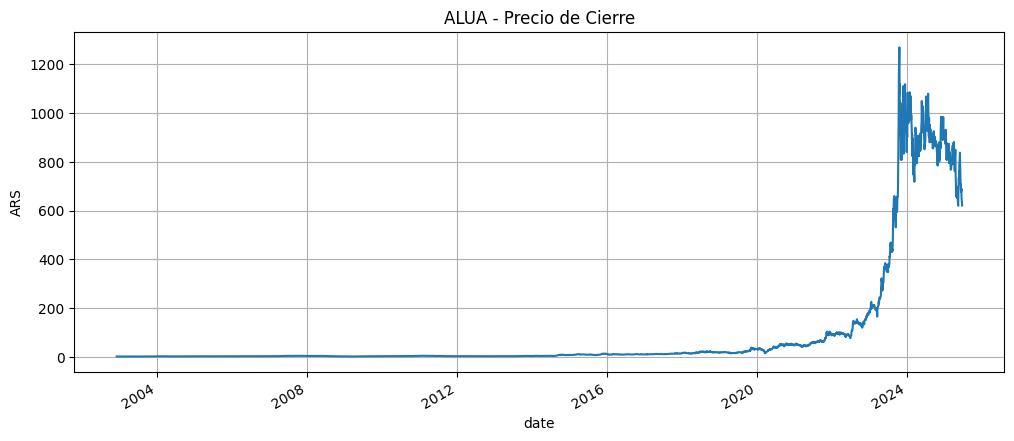

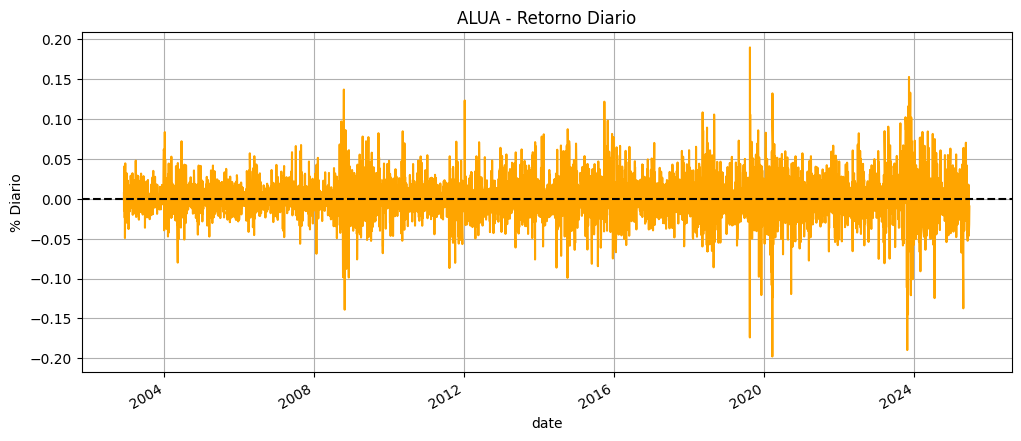

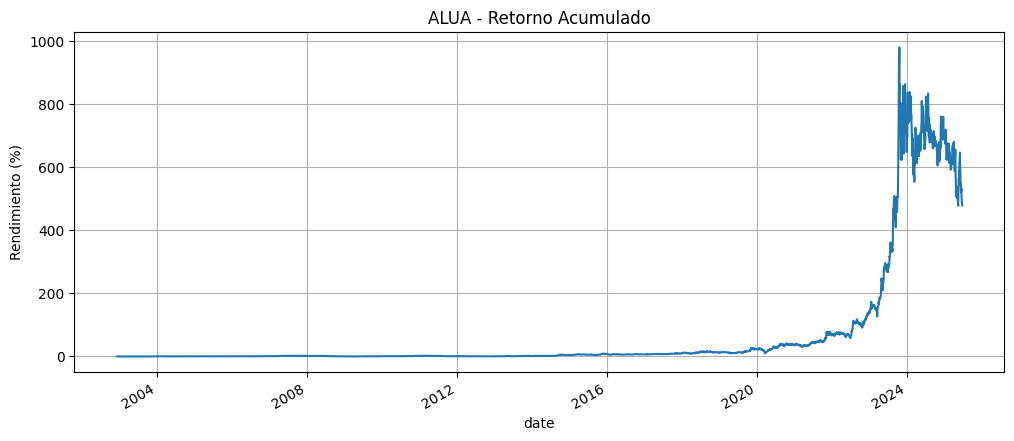

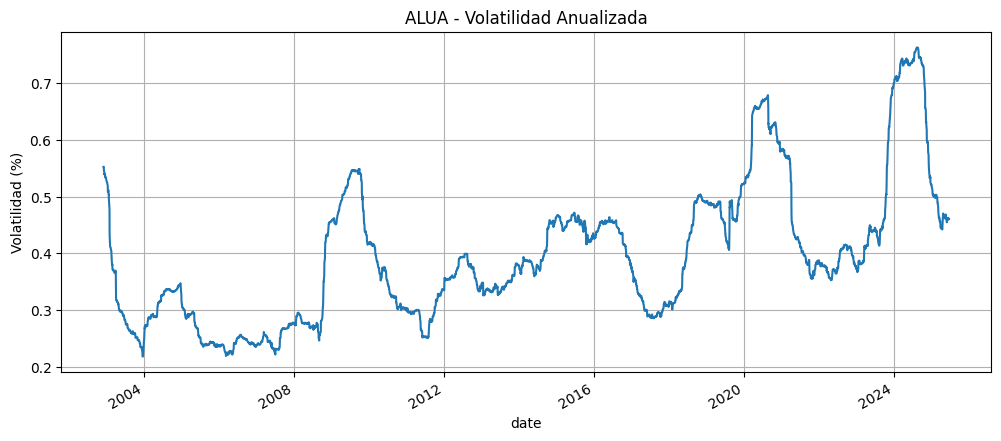

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


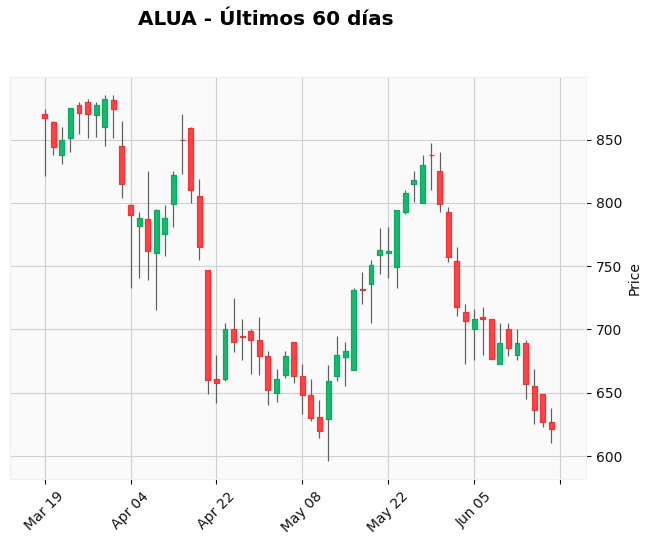

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Descargar datos históricos de ALUA
ticker = "ALUA"
url = f"https://data912.com/historical/stocks/{ticker}"
df = pd.DataFrame(requests.get(url).json())

# Convertir fechas a datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Renombrar columnas
df.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'dr': 'Return', 'sa': 'Sigma_Anual'}, inplace=True)



plt.figure(figsize=(12, 5))
df['Close'].plot(title=f'{ticker} - Precio de Cierre')
plt.ylabel('ARS')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))
df['Return'].plot(title=f'{ticker} - Retorno Diario', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('% Diario')
plt.grid(True)
plt.show()



df['Rend_Acum'] = (1 + df['Return']).cumprod() - 1
plt.figure(figsize=(12, 5))
df['Rend_Acum'].plot(title=f'{ticker} - Retorno Acumulado')
plt.ylabel('Rendimiento (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
df['Sigma_Anual'].plot(title=f'{ticker} - Volatilidad Anualizada')
plt.ylabel('Volatilidad (%)')
plt.grid(True)
plt.show()

!pip install -q mplfinance
import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']].copy()
mpf.plot(df_candle[-60:], type='candle', style='yahoo', title=f'{ticker} - Últimos 60 días')


In [ ]:
df

,Open,High,Low,Close,v,Return,Sigma_Anual,Rend_Acum
date,,,,,,,,
2002-12-03,1.293,1.312,1.293,1.302,211777.0,0.0070,0.5526,0.007000
2002-12-04,1.302,1.302,1.283,1.283,405137.0,-0.0146,0.5529,-0.007702
2002-12-05,1.283,1.293,1.273,1.293,107045.0,0.0078,0.5529,0.000038
2002-12-06,1.283,1.293,1.283,1.293,276137.0,0.0000,0.5475,0.000038
2002-12-09,1.297,1.361,1.297,1.346,276321.0,0.0410,0.5442,0.041039
...,...,...,...,...,...,...,...,...
2025-06-12,680.000,700.000,676.000,689.000,660344.0,0.0058,0.4603,530.565220
2025-06-13,689.000,692.000,645.000,657.000,1310143.0,-0.0464,0.4625,505.900593
2025-06-17,655.000,669.000,625.000,636.000,1658769.0,-0.0320,0.4609,489.679774


In [ ]:
import pandas as pd
import requests

# 1. Obtener y parsear los datos
response = requests.get('https://data912.com/live/arg_stocks')
response.raise_for_status()  # Lanza un error si la petición falla (ej. 404, 500)
df = pd.DataFrame(response.json())

# 2. Procesar datos de forma encadenada
df_analisis = (
    df.assign(
        # Convertir columnas a numérico. 'coerce' pone NaN si no puede convertir.
        px_bid=pd.to_numeric(df['px_bid'], errors='coerce'),
        px_ask=pd.to_numeric(df['px_ask'], errors='coerce')
    )
    .dropna(subset=['px_bid', 'px_ask'])  # Eliminar filas con precios no válidos
    .assign(
        # Calcular el spread porcentual
        spread_pct=lambda x: (x['px_ask'] - x['px_bid']) / x['px_ask'] * 100
    )
    .sort_values('spread_pct')  # Ordenar por spread para encontrar los más líquidos
)

# 3. Mostrar resultados
print("--- 5 Activos MÁS Líquidos (Menor Spread) ---")
print(df_analisis[['symbol', 'spread_pct']].head(5).to_string(index=False))

print("\n--- 5 Activos MENOS Líquidos (Mayor Spread) ---")
# Para los menos líquidos, tomamos los 5 últimos y los reordenamos para ver el peor primero
print(
    df_analisis[['symbol', 'spread_pct']]
    .tail(5)
    .sort_values('spread_pct', ascending=False)
    .to_string(index=False)
)

--- 5 Activos MÁS Líquidos (Menor Spread) ---
symbol  spread_pct
  GCLA    0.884956
  GRIM    2.669903
  INTR    3.084833
 TRAND    3.317536
  METR    3.500000

--- 5 Activos MENOS Líquidos (Mayor Spread) ---
symbol  spread_pct
  POLL  100.000000
 ECOGD   99.178571
 VALOD   96.764706
 TECOD   95.970696
 METRD   93.604651


In [ ]:
df_analisis

,symbol,q_bid,px_bid,px_ask,q_ask,v,q_op,c,pct_change,spread_pct
42,GCLA,1106.0,2800.000,2825.00,175.0,2874.0,39.0,2820.000,0.53,0.884956
45,GRIM,1000.0,2005.000,2060.00,250.0,14923.0,67.0,2005.000,-7.60,2.669903
50,INTR,50.0,377.000,389.00,450.0,3622.0,6.0,390.000,1.43,3.084833
84,TRAND,663.0,2.040,2.11,1579.0,1018.0,18.0,2.095,-0.23,3.317536
59,METR,127.0,1930.000,2000.00,300.0,138564.0,999.0,1950.000,-0.25,3.500000
...,...,...,...,...,...,...,...,...,...,...
60,METRD,1000.0,0.110,1.72,226.0,2422.0,27.0,1.675,-0.29,93.604651
78,TECOD,100.0,0.110,2.73,300.0,182.0,10.0,1.880,1.89,95.970696
88,VALOD,1000.0,0.011,0.34,400.0,2537.0,1007.0,0.286,-1.37,96.764706
33,ECOGD,1.0,0.230,28.00,300.0,18.0,3.0,22.500,7.14,99.178571
